### Step 1. 필요한 라이브러리 임포트

In [1]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) 확인

In [3]:
pd.read_csv('C:/STUDY/StudyPandas/data/drinks.csv')


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 drinks 저장해주세요**  
data : drinks.csv

In [4]:
drinks = pd.read_csv('C:/STUDY/StudyPandas/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. 어느 대륙(continent)이 평균 맥주 소모량이 가장 높은가요?

EU

- 맥주를 제일 많이 소모하는 country 구하기 ( 참고 )

In [34]:
drinks[drinks['beer_servings'] == drinks['beer_servings'].max()]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF


In [81]:
avg_beer_servings = pd.DataFrame(drinks.groupby('continent')['beer_servings'].mean())
avg_beer_servings

,beer_servings
continent,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,175.083333


In [78]:
continent = drinks['continent'].unique()
print(continent)

['AS' 'EU' 'AF' nan 'SA' 'OC']


In [80]:
continent_beer_serving_means= []
for c in continent:
    m=drinks.loc[drinks.continent == c , : ].beer_servings.mean()
    continent_beer_serving_means.append((c,m))

continent_beer_serving_means

[('AS', 37.04545454545455),
 ('EU', 193.77777777777777),
 ('AF', 61.471698113207545),
 (nan, nan),
 ('SA', 175.08333333333334),
 ('OC', 89.6875)]

In [89]:
beer_serving_avg_2 = pd.DataFrame({
    'continent' : [y for y, m in continent_beer_serving_means],
    'beer_servings' : [m for y ,m in continent_beer_serving_means]
})
beer_serving_avg_2


,continent,beer_servings
0,AS,37.045455
1,EU,193.777778
2,AF,61.471698
3,NaN,NaN
4,SA,175.083333
5,OC,89.687500


In [93]:
beer_serving_avg_2_drop=beer_serving_avg_2.dropna()
beer_serving_avg_2_drop

,continent,beer_servings
0,AS,37.045455
1,EU,193.777778
2,AF,61.471698
4,SA,175.083333
5,OC,89.687500


In [37]:
max_beer = avg_beer_servings.max()
max_beer

193.77777777777777

### Step 5. 각 대륙(continent)별 와인 소모 통계값 계산해주세요

count, mean,std, min, max값은 'describe'를 통해 한번에 조회할 수 있습니다

groupby후 describe를 적용해보세요

In [95]:
avg_wine_servings = drinks.groupby('continent')['wine_servings'].describe()
avg_wine_servings


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. 평균 알코올 소비량을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 평균값을 구해주세요

In [69]:
avg_alchol_servings = drinks.groupby('continent')['beer_servings','spirit_servings','wine_servings',	
                                                  'total_litres_of_pure_alcohol'].mean()

avg_alchol_servings

C:\Users\82102\AppData\Local\Temp\ipykernel_10128\3533809803.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_alchol_servings = drinks.groupby('continent')['beer_servings','spirit_servings','wine_servings',


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. 알코올 소비량 중간값을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 중간값을 구해주세요

중간값은 .median()으로 구합니다

In [70]:
med_alchol_servings = drinks.groupby('continent')['beer_servings','spirit_servings','wine_servings',	
                                                  'total_litres_of_pure_alcohol'].median()

med_alchol_servings

C:\Users\82102\AppData\Local\Temp\ipykernel_10128\488796142.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  med_alchol_servings = drinks.groupby('continent')['beer_servings','spirit_servings','wine_servings',


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. 증류주(spirit) 소비량의 평균, 최소, 최대값을 구해주세요

Hint: groupby와 agg 함수를 사용하여 한번에 표현해주세요

### Step 9. 대륙별 맥주 소비량의 평균을 Bar 그래프로 표현해주세요

<BarContainer object of 5 artists>

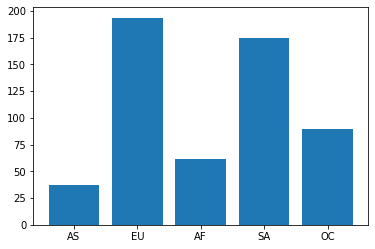

In [94]:
import matplotlib.pyplot as plt
bar_plot = plt.figure()
axes1 = bar_plot.add_subplot(1,1,1)
axes1.bar(beer_serving_avg_2_drop['continent'],beer_serving_avg_2_drop['beer_servings'])
